In [1]:
import sys
import pandas as pd
import numpy as np
from itertools import combinations

# Generate all possible combinations.

In [2]:
atoms_pool = [12, 13, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 38, 56]
c = []
for i in range(5, 11):
    c += list(combinations(atoms_pool, i))
df = pd.DataFrame({'atom_list': c})
atom_dict = {
    12: 'Mg',
    13: 'Al',
    20: 'Ca',
    22: 'Ti',
    23: 'V',
    24: 'Cr',
    25: 'Mn',
    26: 'Fe',
    27: 'Co',
    28: 'Ni',
    29: 'Cu',
    30: 'Zn',
    38: 'Sr',
    56: 'Ba',
}
for an, name in atom_dict.items():
    df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
df['Stabilized'] = -1
X = df[atom_dict.values()]
df

,atom_list,Mg,Al,Ca,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Sr,Ba,Stabilized
0,"(12, 13, 20, 22, 23)",0.2,0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,"(12, 13, 20, 22, 24)",0.2,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,"(12, 13, 20, 22, 25)",0.2,0.2,0.2,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,"(12, 13, 20, 22, 26)",0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,"(12, 13, 20, 22, 27)",0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14438,"(22, 23, 24, 25, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,-1
14439,"(22, 23, 24, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1
14440,"(22, 23, 25, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1
14441,"(22, 24, 25, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1


# Kennard-Stone algorithm

In [3]:
def kennardstonealgorithm(x_variables, k):
    x_variables = np.array(x_variables)
    original_x = x_variables
    distance_to_average = ((x_variables - np.tile(x_variables.mean(axis=0), (x_variables.shape[0], 1))) ** 2).sum(axis=1)
    max_distance_sample_number = np.where(distance_to_average == np.max(distance_to_average))
    max_distance_sample_number = max_distance_sample_number[0][0]
    selected_sample_numbers = list()
    selected_sample_numbers.append(max_distance_sample_number)
    remaining_sample_numbers = np.arange(0, x_variables.shape[0], 1)
    x_variables = np.delete(x_variables, selected_sample_numbers, 0)
    remaining_sample_numbers = np.delete(remaining_sample_numbers, selected_sample_numbers, 0)
    for iteration in range(1, k):
        sys.stdout.write('\r %i / %i' % (iteration, k))
        selected_samples = original_x[selected_sample_numbers, :]
        min_distance_to_selected_samples = list()
        for min_distance_calculation_number in range(0, x_variables.shape[0]):
            distance_to_selected_samples = ((selected_samples - np.tile(x_variables[min_distance_calculation_number, :],
                                                                        (selected_samples.shape[0], 1))) ** 2).sum(axis=1)
            min_distance_to_selected_samples.append(np.min(distance_to_selected_samples))
        max_distance_sample_number = np.where(
            min_distance_to_selected_samples == np.max(min_distance_to_selected_samples))
        max_distance_sample_number = max_distance_sample_number[0][0]
        selected_sample_numbers.append(remaining_sample_numbers[max_distance_sample_number])
        x_variables = np.delete(x_variables, max_distance_sample_number, 0)
        remaining_sample_numbers = np.delete(remaining_sample_numbers, max_distance_sample_number, 0)
 
    return selected_sample_numbers, remaining_sample_numbers

In [4]:
# n samples are selected using kennard stone algorithm
n = 300
train_idx, test_idx = kennardstonealgorithm(X, n)

 299 / 300

# PCA

Text(0, 0.5, 'PCA 2')

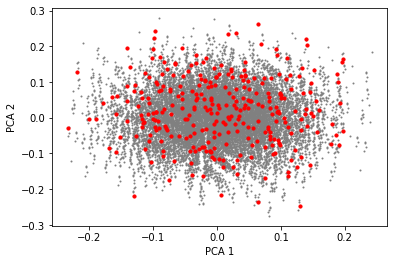

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2).fit(X)
X_ = pca.transform(X)
plt.scatter(X_[test_idx][:, 0], X_[test_idx][:, 1], color='grey', s=1)
plt.scatter(X_[train_idx][:, 0], X_[train_idx][:, 1], s=10, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

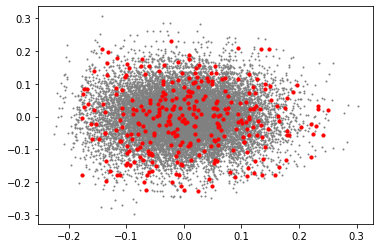

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2).fit(X)
X1 = pca.transform(X)
df2 = pd.read_csv('../datasets/sample3.txt', sep='\s+')
df2.atom_list = df2.atom_list.apply(lambda x: list(map(int, x.split(','))))
for an, name in atom_dict.items():
    df2[name] = df2.atom_list.apply(lambda x: x.count(an) / len(x))
X2 = pca.transform(df2[atom_dict.values()])
plt.scatter(X1[:, 0], X1[:, 1], color='grey', s=1)
plt.scatter(X2[:, 0], X2[:, 1], s=10, color='red')